In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import os
import cv2
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns # for confusion matrix
import numpy as np
import matplotlib.pyplot as plt # to plot image, graph

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
dictionary = r"./gdrive/My Drive/data" 

In [ ]:
categorize = ['WithoutMask', 'WithMask']
img_max_size = 64

#data
X = []
#(0,1)
y = []

def create_data():
    for category in categorize:
        path = os.path.join(dictionary, category)
        class_num_label = categorize.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array, (img_max_size,img_max_size))
                X.append(img_array)
                y.append(class_num_label)
            except:
                pass
            
create_data()

In [ ]:
#-------------------Convert to Numpy --------------
sample_size = len(y)
X = np.array(X).flatten().reshape(sample_size, img_max_size*img_max_size) # pixel-features

In [ ]:
#------------------------Decision Tree------------- 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score=accuracy_score( y_test,y_pred)
print("Accuracy score of Decision Tree: ",(score))


Accuracy score of Decision Tree:  0.7498345466578424



Classification Report DecisionTree
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       767
           1       0.74      0.76      0.75       744

    accuracy                           0.75      1511
   macro avg       0.75      0.75      0.75      1511
weighted avg       0.75      0.75      0.75      1511



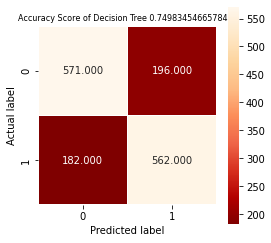

In [ ]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True,fmt='.3f',linewidths=.5,square=True, cmap='OrRd_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score of Decision Tree {0}'.format(accuracy_score(y_test, y_pred))
plt.title(title,size=8)

#Classfication
print("\nClassification Report DecisionTree\n", classification_report(y_test, y_pred))


In [ ]:
#-----------------Logistic Regression---------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression( max_iter=3000)
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train)
xtest = sc_x.transform(X_test)
model=model.fit(xtrain, y_train) #Training the model
predictions = model.predict(xtest)
accur=accuracy_score(y_test, predictions)
print("Accuracy Score of Logistic Regression:", accur)

Accuracy Score of Logistic Regression: 0.6671078755790867



Classification Report Logistic Regression
               precision    recall  f1-score   support

           0       0.65      0.73      0.69       766
           1       0.68      0.61      0.64       745

    accuracy                           0.67      1511
   macro avg       0.67      0.67      0.67      1511
weighted avg       0.67      0.67      0.67      1511



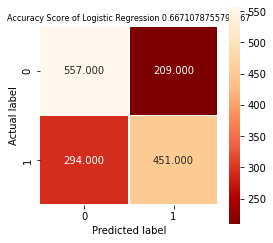

In [ ]:
# Calculate Confusion Matrix
cm2 = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4,4))
# Heatmap visualization of accuracy
sns.heatmap(cm2,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='OrRd_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score of Logistic Regression {0}'.format(accuracy_score(y_test, predictions))
plt.title(title,size=8)


#Classfication
print("\nClassification Report Logistic Regression\n", classification_report(y_test, predictions))

In [ ]:
#---------------------Naive Bayers--------------------
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict = gnb.predict(X_test)
#prediction =  accuracy_score(y_test, y_predict)
print('Accuracy Score of Naive Bayers {0}'.format(accuracy_score(y_test, y_predict)))

Accuracy Score of Naive Bayers 0.6770350761085374



Classification Report Naive Bayers 
               precision    recall  f1-score   support

           0       0.68      0.70      0.69       766
           1       0.68      0.65      0.67       745

    accuracy                           0.68      1511
   macro avg       0.68      0.68      0.68      1511
weighted avg       0.68      0.68      0.68      1511



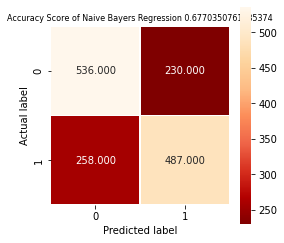

In [ ]:
# Calculate Confusion Matrix
cm3 = confusion_matrix( y_test,y_predict)
plt.figure(figsize=(4,4))
# Heatmap visualization of accuracy
sns.heatmap(cm3,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='OrRd_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score of Naive Bayers Regression {0}'.format(accuracy_score(y_test, y_predict))
plt.title(title,size=8)


#Classfication
print("\nClassification Report Naive Bayers \n", classification_report( y_test,y_predict))